<a href="https://colab.research.google.com/github/sumit-mandal/colab_google/blob/main/Copy_of_convolutional_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import random



In [125]:
np.random.seed(0)

In [126]:

(X_train,y_train),(X_test,y_test) = mnist.load_data()


In [127]:
print('x train shape :',X_train.shape)
print('x test shape,',X_test.shape)
print('y train shape',y_train.shape)
print('y test shape',y_test.shape)

x train shape : (60000, 28, 28)
x test shape, (10000, 28, 28)
y train shape (60000,)
y test shape (10000,)


In [128]:
assert(X_train.shape[0] == y_train.shape[0]),'the number of image is not equal to number of labels'
assert(X_test.shape[0] == y_test.shape[0]),'the number of image is not equal to the label'
assert(X_train.shape[1:]== (28,28)),"The dimension of the images are not 28x 28"
assert(X_test.shape[1:] == (28,28)),"The dimension of the images are not 28x28"

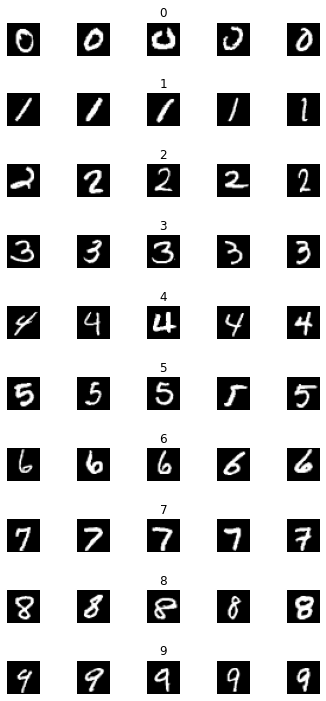

In [129]:
num_of_samples = []
cols = 5
num_classes = 10 #rows

fig,axs = plt.subplots(nrows=num_classes,ncols=cols,figsize = (5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train ==j]
        axs[j][i].imshow(x_selected[random.randint(0,len(x_selected-1)),:,:],cmap = plt.get_cmap("gray"))
                #with imshow(x_selected) we plot image which corresponds to rows and colms that is being iterated through
        #after that we will plot randomly selected image which corresponds to current iteration to the current class
        #for each class j being iterated through access a random image from first dimension and then display full 28x28 dimension
        #range is from 0 to last images i.e x_selected-1
        axs[j][i].axis("off")

        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))
            #to return number on the middle f row i.e j =2



[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

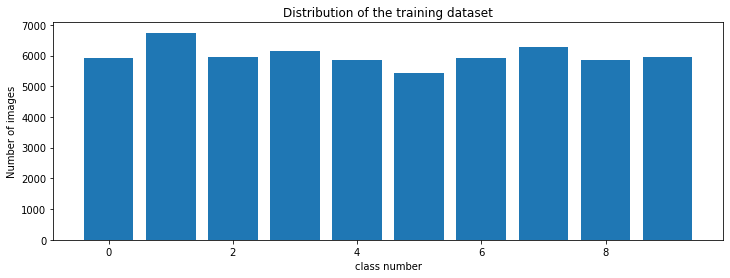

In [130]:
 print(num_of_samples)
 plt.figure(figsize=(12,4))
 plt.bar(range(0,num_classes),num_of_samples)
 plt.title("Distribution of the training dataset")
 plt.xlabel("class number")
 plt.ylabel("Number of images")

In [131]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [132]:
#one hot encoding
y_train = to_categorical(y_train,10) #converts class vector to binary class matrix
y_test = to_categorical(y_test,10)

In [133]:
#normalization process
X_train = X_train/255
X_test = X_test/255
#we have divides by 255 because we have 255 color in rgb

In [134]:
#define the lenet_model_function

def leNet_model():
  model = Sequential()
  model.add(Conv2D(30,(5,5),input_shape=(28,28,1),activation='relu'))
  #instead of dense now we'll be using conv2d layer
  #no.of filters our layer will have here we have 30,then we have tuples to deffine signs of filter
  #input_shape = (28,28,1). input will take image of 28x28 with depth of 1 with single channel
  #after this layer our 28x28 image is going to be reduced down to 30 feature map,each one 24x24
  #padding works to preserve the spatial funcationality of image

  #now adding pooling layer
  model.add(MaxPooling2D(pool_size=(2,2))) #it takes size of pooling element as argument
  #after pooling our convulated image is going to reduce from 24X24x30 to smaller shape of 12x12x30

  #adding another conv layer
  model.add(Conv2D(15,(3,3),activation='relu'))

  #adding another pooling
  model.add(MaxPooling2D(pool_size=(2,2)))

  #now flattening
  model.add(Flatten())  #this is important as it converts image into 1D .
  #so that image can be feed to fully connected layer

  #feeding into fully connected layer
  model.add(Dense(500,activation='relu'))
  #500 no. of nodes

  #output layer
  model.add(Dense(num_classes,activation='softmax'))

  model.compile(Adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [135]:
model=leNet_model()
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 500)               188000    
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

In [136]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.1,batch_size=400,verbose=1,shuffle=True)
#Trains the model for a fixed number of epochs (iterations on a dataset).

Epoch 1/10
135/135 [==============================] - 2s 14ms/step - loss: 0.5098 - accuracy: 0.8381 - val_loss: 0.0719 - val_accuracy: 0.9787
Epoch 2/10
135/135 [==============================] - 2s 11ms/step - loss: 0.0540 - accuracy: 0.9831 - val_loss: 0.0446 - val_accuracy: 0.9873
Epoch 3/10
135/135 [==============================] - 2s 11ms/step - loss: 0.0332 - accuracy: 0.9896 - val_loss: 0.0569 - val_accuracy: 0.9837
Epoch 4/10
135/135 [==============================] - 2s 11ms/step - loss: 0.0293 - accuracy: 0.9902 - val_loss: 0.0387 - val_accuracy: 0.9897
Epoch 5/10
135/135 [==============================] - 2s 11ms/step - loss: 0.0205 - accuracy: 0.9934 - val_loss: 0.0485 - val_accuracy: 0.9888
Epoch 6/10
135/135 [==============================] - 2s 11ms/step - loss: 0.0229 - accuracy: 0.9928 - val_loss: 0.0466 - val_accuracy: 0.9882
Epoch 7/10
135/135 [==============================] - 2s 11ms/step - loss: 0.0195 - accuracy: 0.9935 - val_loss: 0.0798 - val_accuracy: 0.9830

Text(0.5, 0, 'epoch')

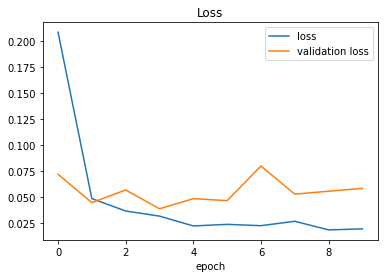

In [137]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','validation loss'])
plt.title('Loss')
plt.xlabel('epoch')


Text(0.5, 0, 'epoch')

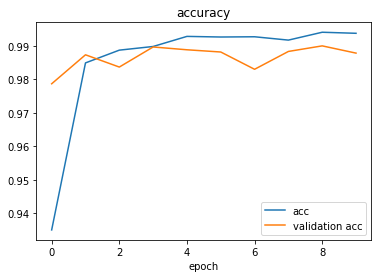

In [138]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc','validation acc'])
plt.title('accuracy')
plt.xlabel('epoch')


<Response [200]>


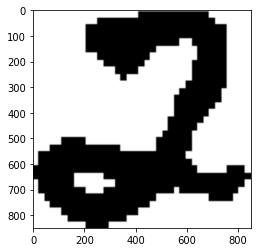

In [139]:
import requests
from PIL import Image #python imaging library
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url,stream = True)
print(response)
img = Image.open(response.raw)
plt.imshow(img)

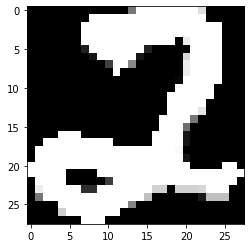

In [140]:
import cv2

img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))



In [141]:
img = img/255
img = img.reshape(1,28,28,1)

In [142]:
prediction = np.argmax(model.predict(img))
print("predicted digit:", str(prediction))


predicted digit: 2
